In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [ ]:
df=pd.read_csv('Credit.csv')
df.head() # кредитный рейтинг

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [ ]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ', '_')
df.head(1)

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High


In [ ]:
# age возраст
# gender пол
# income доход
# education образование
# marital_status семейное положение
# number_of_children количество детей
# home_ownership собственник жилья/аренда
# credit_score кредитный рейтинг

In [ ]:
df.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 164 non-null    int64 
 1   gender              164 non-null    object
 2   income              164 non-null    int64 
 3   education           164 non-null    object
 4   marital_status      164 non-null    object
 5   number_of_children  164 non-null    int64 
 6   home_ownership      164 non-null    object
 7   credit_score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [ ]:
df.duplicated().sum()

62

In [ ]:
# в данном случае данные обезличены, поэтому считаем, что дубликатов нет

In [ ]:
df.nunique()

age                   29
gender                 2
income                52
education              5
marital_status         2
number_of_children     4
home_ownership         2
credit_score           3
dtype: int64

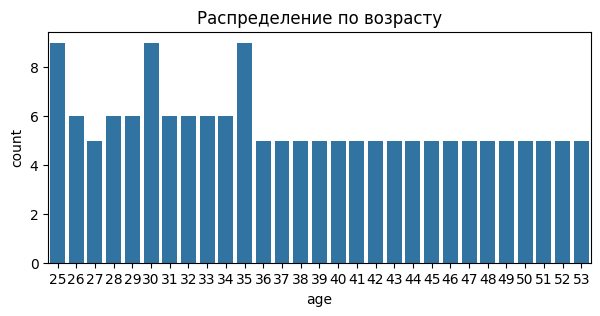

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.age);
plt.title('Распределение по возрасту');

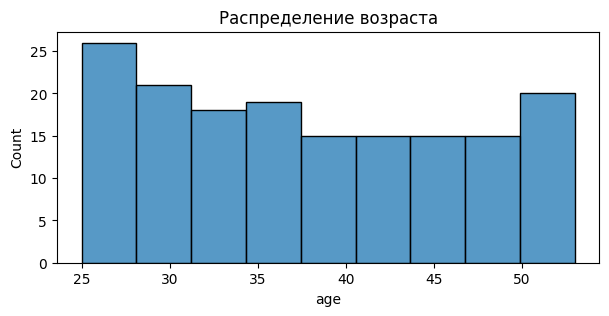

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(x=df.age);
plt.title('Распределение возраста');

In [ ]:
df.gender.value_counts()

gender
Female    86
Male      78
Name: count, dtype: int64

In [ ]:
stats.chisquare(df.gender.value_counts().values, [82,82])

Power_divergenceResult(statistic=0.3902439024390244, pvalue=0.5321712241488488)

In [ ]:
# распределение по полу равномерно

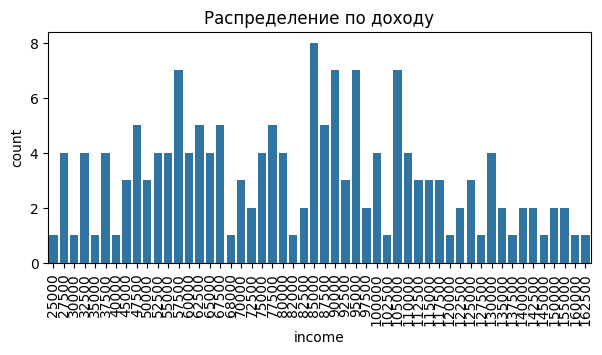

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.income);
plt.title('Распределение по доходу');
plt.xticks(rotation=90);

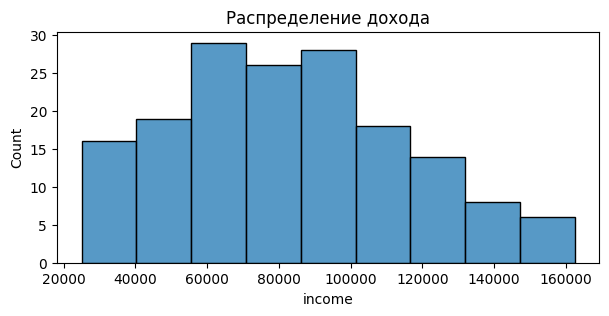

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(x=df.income);
plt.title('Распределение дохода');

In [ ]:
df.education.value_counts()

education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

In [ ]:
stats.chisquare(df.education.value_counts().values, [32.8,32.8,32.8,32.8,32.8])

Power_divergenceResult(statistic=5.085365853658537, pvalue=0.2786500465805411)

In [ ]:
# распределение по образованию равномерно

In [ ]:
df.marital_status.value_counts()

marital_status
Married    87
Single     77
Name: count, dtype: int64

In [ ]:
stats.chisquare(df.marital_status.value_counts().values, [82,82])

Power_divergenceResult(statistic=0.6097560975609756, pvalue=0.43487965849578347)

In [ ]:
# распределение по семейному положению равномерно

In [ ]:
df.number_of_children.value_counts()

number_of_children
0    97
1    32
2    30
3     5
Name: count, dtype: int64

In [ ]:
stats.chisquare(df.number_of_children.value_counts().values, [41,41,41,41])

Power_divergenceResult(statistic=113.02439024390243, pvalue=2.4512318390162523e-24)

In [ ]:
# распределение по количеству детей не равномерно

In [ ]:
df.home_ownership.value_counts()

home_ownership
Owned     111
Rented     53
Name: count, dtype: int64

In [ ]:
stats.chisquare(df.home_ownership.value_counts().values, [82,82])

Power_divergenceResult(statistic=20.51219512195122, pvalue=5.9252535998199065e-06)

In [ ]:
# распределение по имуществу не равномерно

In [ ]:
df.credit_score.value_counts()

credit_score
High       113
Average     36
Low         15
Name: count, dtype: int64

In [ ]:
stats.chisquare(df.credit_score.value_counts().values,\
                [54.666667,54.666667,54.666667])

Power_divergenceResult(statistic=97.40243843047296, pvalue=7.068532072031364e-22)

In [ ]:
# распределение по кредитному рейтингу не равномерно

In [ ]:
df.describe()

,age,income,number_of_children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [ ]:
df.groupby('credit_score').agg({'age':'mean'})

,age
credit_score,
Average,29.527778
High,41.991150
Low,28.000000


In [ ]:
df.groupby('credit_score').agg({'age':'median'})

,age
credit_score,
Average,31.0
High,42.0
Low,28.0


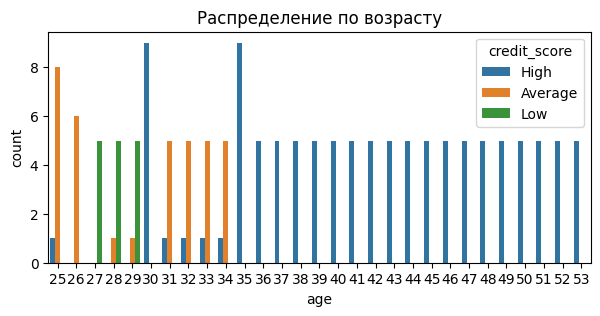

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.age, hue=df.credit_score);
plt.title('Распределение по возрасту');

In [ ]:
# возраст должен быть > 29 лет

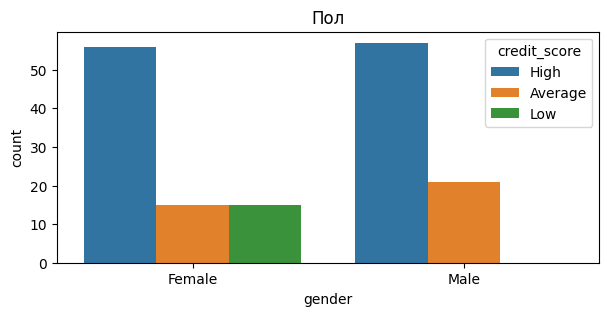

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.gender, hue=df.credit_score);
plt.title('Пол');

In [ ]:
pd.crosstab(df.gender, df.credit_score)

credit_score,Average,High,Low
gender,,,
Female,15,56,15
Male,21,57,0


In [ ]:
stats.chi2_contingency(pd.crosstab(df.gender, df.credit_score))

Chi2ContingencyResult(statistic=15.655859335834638, pvalue=0.0003984495498327187, dof=2, expected_freq=array([[18.87804878, 59.25609756,  7.86585366],
       [17.12195122, 53.74390244,  7.13414634]]))

In [ ]:
# рейтинг зависит от пола, по данным мужчины для выдачи кредита предпочтительнее

In [ ]:
df.groupby('credit_score').agg({'income':'mean'})

,income
credit_score,
Average,55500.00000
High,99641.59292
Low,32000.00000


In [ ]:
df.groupby('credit_score').agg({'income':'median'})

,income
credit_score,
Average,55000.0
High,95000.0
Low,32500.0


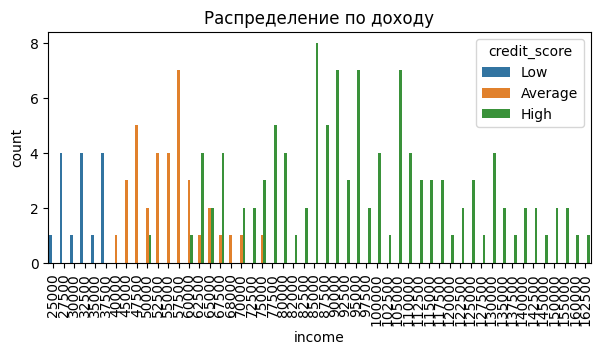

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.income, hue=df.credit_score);
plt.title('Распределение по доходу');
plt.xticks(rotation=90);

In [ ]:
# доход должен быть > 37500

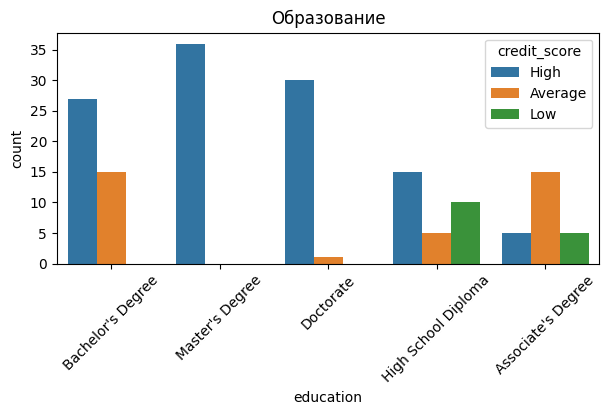

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.education, hue=df.credit_score);
plt.title('Образование');
plt.xticks(rotation=45);

In [ ]:
pd.crosstab(df.education, df.credit_score)

credit_score,Average,High,Low
education,,,
Associate's Degree,15,5,5
Bachelor's Degree,15,27,0
Doctorate,1,30,0
High School Diploma,5,15,10
Master's Degree,0,36,0


In [ ]:
stats.chi2_contingency(pd.crosstab(df.education, df.credit_score))

Chi2ContingencyResult(statistic=84.63607036750058, pvalue=5.676364574930944e-15, dof=8, expected_freq=array([[ 5.48780488, 17.22560976,  2.28658537],
       [ 9.2195122 , 28.93902439,  3.84146341],
       [ 6.80487805, 21.3597561 ,  2.83536585],
       [ 6.58536585, 20.67073171,  2.74390244],
       [ 7.90243902, 24.80487805,  3.29268293]]))

In [ ]:
# рейтинг зависит от образования, наименее предпочтительно образование
# High School Diploma и Associate's Degree

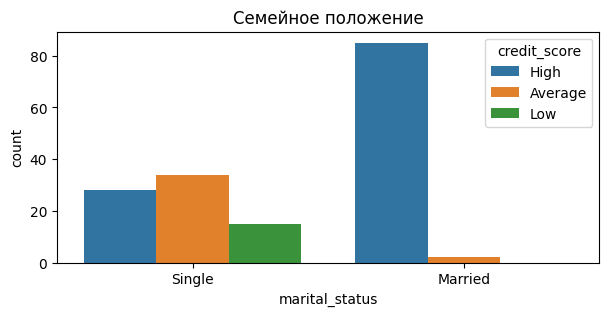

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.marital_status, hue=df.credit_score);
plt.title('Семейное положение');

In [ ]:
pd.crosstab(df.marital_status, df.credit_score)

credit_score,Average,High,Low
marital_status,,,
Married,2,85,0
Single,34,28,15


In [ ]:
stats.chi2_contingency(pd.crosstab(df.marital_status, df.credit_score))

Chi2ContingencyResult(statistic=71.85405591142546, pvalue=2.495111785960503e-16, dof=2, expected_freq=array([[19.09756098, 59.94512195,  7.95731707],
       [16.90243902, 53.05487805,  7.04268293]]))

In [ ]:
# рейтинг зависит от семейного положения, по данным семейные для выдачи
# кредита предпочтительнее

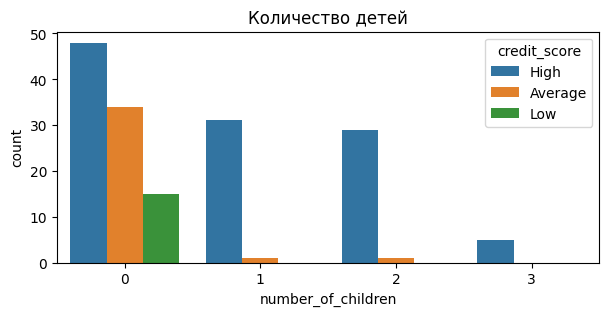

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.number_of_children, hue=df.credit_score);
plt.title('Количество детей');

In [ ]:
pd.crosstab(df.number_of_children, df.credit_score)

credit_score,Average,High,Low
number_of_children,,,
0,34,48,15
1,1,31,0
2,1,29,0
3,0,5,0


In [ ]:
stats.chi2_contingency(pd.crosstab(df.number_of_children, df.credit_score))

Chi2ContingencyResult(statistic=41.946115415091214, pvalue=1.884370688425653e-07, dof=6, expected_freq=array([[21.29268293, 66.83536585,  8.87195122],
       [ 7.02439024, 22.04878049,  2.92682927],
       [ 6.58536585, 20.67073171,  2.74390244],
       [ 1.09756098,  3.44512195,  0.45731707]]))

In [ ]:
# рейтинг зависит от количества детей, по данным заемщики с детьми для выдачи
# кредита предпочтительнее

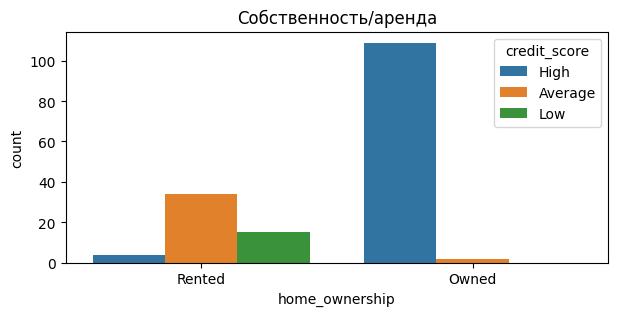

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df.home_ownership, hue=df.credit_score);
plt.title('Собственность/аренда');

In [ ]:
pd.crosstab(df.home_ownership, df.credit_score)

credit_score,Average,High,Low
home_ownership,,,
Owned,2,109,0
Rented,34,4,15


In [ ]:
stats.chi2_contingency(pd.crosstab(df.home_ownership, df.credit_score))

Chi2ContingencyResult(statistic=137.7244140116072, pvalue=1.2402906955258536e-30, dof=2, expected_freq=array([[24.36585366, 76.48170732, 10.15243902],
       [11.63414634, 36.51829268,  4.84756098]]))

In [ ]:
# рейтинг зависит от наличия жилья, по данным заемщики с собственным жильем для выдачи
# кредита предпочтительнее

In [ ]:
# Портрет наиболее добросовестного заемщика:
# мужчина, старше 29 лет, с доходом выше 37500, с образованием Bachelor's Degree,
# Master's Degree, Doctorate, семейный, имеющий детей, собственник жилья

In [ ]:
df_=df.copy()

In [ ]:
df_.head(2)

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High


In [ ]:
df_.loc[df_.loc[:, 'gender']=='Female', 'gender']=0
df_.loc[df_.loc[:, 'gender']=='Male', 'gender']=1

In [ ]:
df_.loc[df_.loc[:, 'education']=='High School Diploma', 'education']=0
df_.loc[df_.loc[:, 'education']=='Associate\'s Degree', 'education']=1
df_.loc[df_.loc[:, 'education']=='Bachelor\'s Degree', 'education']=2
df_.loc[df_.loc[:, 'education']=='Master\'s Degree', 'education']=3
df_.loc[df_.loc[:, 'education']=='Doctorate', 'education']=4

In [ ]:
df_.loc[df_.loc[:, 'marital_status']=='Single', 'marital_status']=0
df_.loc[df_.loc[:, 'marital_status']=='Married', 'marital_status']=1

In [ ]:
df_.loc[df_.loc[:, 'home_ownership']=='Rented', 'home_ownership']=0
df_.loc[df_.loc[:, 'home_ownership']=='Owned', 'home_ownership']=1

In [ ]:
X=df_.drop('credit_score', axis= 1)
Y=df_['credit_score']

In [ ]:
model=tree.DecisionTreeClassifier()
model=model.fit(X, Y)

[Text(0.5555555555555556, 0.9166666666666666, 'x[6] <= 0.5\ngini = 0.469\nsamples = 164\nvalue = [36, 113, 15]'),
 Text(0.3333333333333333, 0.75, 'x[2] <= 38750.0\ngini = 0.503\nsamples = 53\nvalue = [34, 4, 15]'),
 Text(0.2222222222222222, 0.5833333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[2] <= 80000.0\ngini = 0.188\nsamples = 38\nvalue = [34, 4, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 25.5\ngini = 0.056\nsamples = 35\nvalue = [34, 1, 0]'),
 Text(0.2222222222222222, 0.25, 'x[2] <= 52500.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [26, 0, 0]'),
 Text(0.5555555555555556, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text

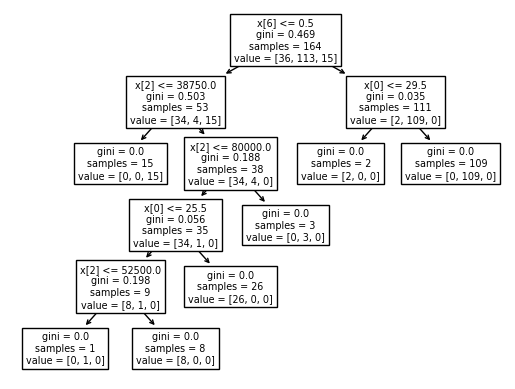

In [ ]:
tree.plot_tree(model)

In [ ]:
# модель строит прогноз на основе данных из столбцов home_ownership, age
# и income
# из модели следует, чтобы отнести заемщика к классу Average или High,
# достаточно наличие собственности жилья и дохода > 38750

In [ ]:
# так как наиболее важно отсеять заемщиков с рейтингом Low, объединим
# рейтинг Average и High в одну категорию High

In [ ]:
df__=df_.copy()

In [ ]:
df__.loc[df__.loc[:, 'credit_score']=='Average', 'credit_score']='High'

In [ ]:
df__.credit_score.value_counts()

credit_score
High    149
Low      15
Name: count, dtype: int64

In [ ]:
X_=df__.drop('credit_score', axis= 1)
Y_=df__['credit_score']

In [ ]:
model=tree.DecisionTreeClassifier()
model=model.fit(X_, Y_)

[Text(0.5, 0.75, 'x[2] <= 38750.0\ngini = 0.166\nsamples = 164\nvalue = [149, 15]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]')]

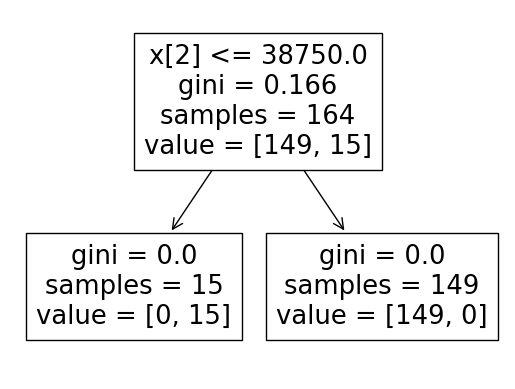

In [ ]:
tree.plot_tree(model)

In [ ]:
# теперь модель строит прогноз на основе данных только из столбца income,
# что для практики явно не достаточно

In [ ]:
# модель случайный лес
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,\
                                                    random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=2)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2)

In [ ]:
# оценка модели
print('accuracy: ', sklearn.metrics.accuracy_score(y_test, clf.predict(x_test)))
print('precision: ', sklearn.metrics.precision_score(y_test, clf.predict(x_test)\
                                                     , average='macro'))
print('recall: ', sklearn.metrics.recall_score(y_test, clf.predict(x_test),\
                                               average='macro'))

accuracy:  0.96
precision:  0.9592803030303031
recall:  0.9592803030303031


In [ ]:
# объект будет отнесен к верному классу с вероятность почти 96%

In [ ]:
# в результате анализа данных были даны рекомендации по составлению
# портрета добросовестного заемщика, а также обучена модель случайный лес